<a href="https://colab.research.google.com/github/TtttttH/COM6911-Team-Juliet/blob/main/DataProcessing/mat2py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  import packages
import scipy.io as scio
import pandas as pd
import os
import pandas as pd
from itertools import groupby
import matplotlib.pyplot as plt


# example of one mat file
data_path = '/content/drive/MyDrive/Industrial Team Project/Dataset/USC-HAD_mat/Subject1/a10t1.mat'
data_mat = scio.loadmat(data_path)
data_mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jul 18 23:19:14 2012',
 '__version__': '1.0',
 'activity': array(['sleeping'], dtype='<U8'),
 'activity_number': array(['10'], dtype='<U2'),
 'age': array(['27'], dtype='<U2'),
 'date': array(['June-2012'], dtype='<U9'),
 'height': array(['164cm'], dtype='<U5'),
 'sensor_location': array(['front-right-hip'], dtype='<U15'),
 'sensor_orientation': array(['x-gravity-y-walking-direction-z-vertical-to-walking-direction'],
       dtype='<U61'),
 'sensor_readings': array([[-0.65369838,  0.71187848, -0.42388594, -0.2039163 , -0.30953297,
         -0.46442151],
        [-0.6468308 ,  0.70825934, -0.4202258 ,  0.10364657, -0.16128452,
         -0.24199039],
        [-0.65026456,  0.71187848, -0.42388594,  0.06961086, -0.10832153,
         -0.16252501],
        ...,
        [-0.6468308 ,  0.61416167, -0.54467106, -6.77722883, -9.71140099,
         -5.52820778],
        [-0.65713215,  0.61054254, -0.537350

In [ ]:
from itertools import groupby

In [ ]:
data_list = []
# col_list = ['age','height','weight','acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z','label']
# data_list.append(col_list)
n = 0
for root,dirs,files in os.walk(r'/content/drive/MyDrive/Industrial Team Project/Dataset/USC-HAD_mat/'):
  if n > 0:
    root_path = root
    file_list = os.listdir(root_path)
    for file_name in file_list:
      feature_list = []
      file_path = root + '/' + file_name
      data_mat = scio.loadmat(file_path)
      for x in data_mat['sensor_readings']:
        # age extraction
        feature_age = [''.join(list(g)) for k,g in groupby(data_mat['age'][0],key = lambda x:x.isdigit())]
        feature_list.append(int(feature_age[0]))
        # height extraction
        feature_height = [''.join(list(g)) for k,g in groupby(data_mat['height'][0],key = lambda x:x.isdigit())]
        feature_list.append(int(feature_height[0]))
        # weight extraction
        feature_weight = [''.join(list(g)) for k,g in groupby(data_mat['weight'][0],key = lambda x:x.isdigit())]
        feature_list.append(int(feature_weight[0]))
        # sensor reading 
        acc_x = x[0]
        feature_list.append(acc_x)
        acc_y = x[1]
        feature_list.append(acc_y)
        acc_z = x[2]
        feature_list.append(acc_z)
        gyro_x = x[3]
        feature_list.append(gyro_x)
        gyro_y = x[4]
        feature_list.append(gyro_y)
        gyro_z = x[5]
        feature_list.append(gyro_z)
        if data_mat.get('activity_number') is None:
          # label
          feature_list.append(100)   
        else:
          feature_list.append(int(data_mat['activity_number'][0]))
        # append to data_list
        data_list.append(feature_list)
        feature_list = []
  n+=1

In [ ]:
len(data_list)

2811490

In [ ]:
# generate a csv file
data_df.to_csv('/content/drive/MyDrive/Industrial Team Project/DataProcessing/USC_HAD.csv',sep = ',',index = False,header = True)

In [ ]:

# read csv file
data_df = pd.read_csv('/content/drive/MyDrive/Industrial Team Project/DataProcessing/USC_HAD.csv')

In [ ]:
data_df_new = data_df[data_df.label != 100]

In [ ]:
print(len(data_df_new))

2809281


In [ ]:
# a dataframe without nan value
data_df_new.head(5)
data_df_new.to_csv('/content/drive/MyDrive/Industrial Team Project/DataProcessing/USC_HAD_raw.csv',sep = ',',index = False,header = True)

In [ ]:
data_raw = data_df_new.iloc[:,3:]

In [ ]:
len(data_raw)

2809281

In [ ]:
data_raw.head(5)

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,0.925848,0.331869,-0.27382,-4.849138,1.836862,-0.599354,7
1,0.922414,0.331869,-0.27382,-3.237809,1.829803,-1.399718,7
2,0.922414,0.331869,-0.27382,-1.626481,1.020218,-2.197093,7
3,0.918980,0.328250,-0.27382,0.387679,1.016325,-2.590186,7
4,0.915547,0.339107,-0.27382,2.401839,1.413761,-2.981848,7


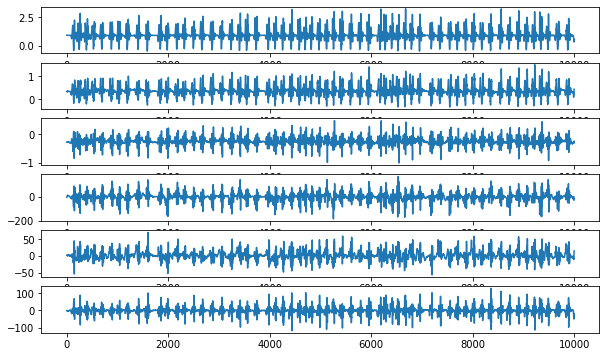

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(6,1,1)
plt.plot(data_raw["acc_x"][:10000])
plt.subplot(6,1,2)
plt.plot(data_raw["acc_y"][:10000])
plt.subplot(6,1,3)
plt.plot(data_raw["acc_z"][:10000])
plt.subplot(6,1,4)
plt.plot(data_raw["gyro_x"][:10000])
plt.subplot(6,1,5)
plt.plot(data_raw["gyro_y"][:10000])
plt.subplot(6,1,6)
plt.plot(data_raw["gyro_z"][:10000])
plt.show()

In [ ]:
# time window setting
